In [1]:
import pickle
import pathlib

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/home/fernando/6/machinelearning/machine_learning/CSRoundPrediction/data


In [3]:
clean_data_path = DATA_DIR / 'processed' / 'csgo_clean.pkl'

In [4]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   time_left                     122410 non-null  float64 
 1   ct_score                      122410 non-null  float64 
 2   t_score                       122410 non-null  float64 
 3   map                           122410 non-null  category
 4   bomb_planted                  122410 non-null  bool    
 5   ct_health                     122410 non-null  float64 
 6   t_health                      122410 non-null  float64 
 7   ct_armor                      122410 non-null  float64 
 8   t_armor                       122410 non-null  float64 
 9   ct_money                      122410 non-null  float64 
 10  t_money                       122410 non-null  float64 
 11  ct_helmets                    122410 non-null  float64 
 12  t_helmets                     

In [6]:
model_data = data.copy()

In [7]:
categorical_columns = ['map']

## Encoding Categorical Variable

In [8]:
model_data['map'].value_counts()

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64

In [9]:
original_data = model_data['map']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['map'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
de_dust2,True,True,True,True,True
de_inferno,False,False,False,False,False
de_mirage,False,False,False,False,False
de_nuke,False,False,False,False,False
de_overpass,False,False,False,False,False
de_train,False,False,False,False,False
de_vertigo,False,False,False,False,False
map,de_dust2,de_dust2,de_dust2,de_dust2,de_dust2


In [10]:
model_data = pd.get_dummies(model_data, drop_first=True)

In [11]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 76 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   bomb_planted                  122410 non-null  bool   
 4   ct_health                     122410 non-null  float64
 5   t_health                      122410 non-null  float64
 6   ct_armor                      122410 non-null  float64
 7   t_armor                       122410 non-null  float64
 8   ct_money                      122410 non-null  float64
 9   t_money                       122410 non-null  float64
 10  ct_helmets                    122410 non-null  float64
 11  t_helmets                     122410 non-null  float64
 12  ct_defuse_kits                122410 non-nul

## Train test split

In [12]:
X = model_data.drop(columns=['round_winner']).copy()
y = model_data['round_winner'].copy()

In [13]:
X.values, y.values

(array([[175.0, 0.0, 0.0, ..., False, False, False],
        [156.03, 0.0, 0.0, ..., False, False, False],
        [96.03, 0.0, 0.0, ..., False, False, False],
        ...,
        [114.93, 11.0, 15.0, ..., False, True, False],
        [94.93, 11.0, 15.0, ..., False, True, False],
        [74.93, 11.0, 15.0, ..., False, True, False]], dtype=object),
 array([1, 1, 1, ..., 0, 0, 0]))

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=69,
)


In [15]:
X.shape, Xtrain.shape, Xtest.shape

((122410, 75), (91807, 75), (30603, 75))

In [16]:
y.shape, ytrain.shape, ytest.shape

((122410,), (91807,), (30603,))

In [17]:
# # 0.74 Mas não converge
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

# model.fit(Xtrain, ytrain)

In [18]:
# # 0.74
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=5,
#     random_state=69,
# )

# model.fit(Xtrain, ytrain)

In [19]:
# # 0.76
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier()

# model.fit(Xtrain, ytrain)

In [20]:
# # O melhor que eu consegui mexendo nos parametros foi 0.76
# from sklearn.neural_network import MLPClassifier

# model = MLPClassifier(
#     hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
#     activation='relu',            # Use ReLU activation function
#     solver='adam',                # Use Adam optimizer
#     learning_rate='constant',     # Adaptive learning rate
#     random_state=42               # Ensure reproducibility
# )

# model.fit(Xtrain, ytrain)

In [21]:
# 0.82
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=40, random_state=69)

model.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=40, random_state=69)

In [22]:
# # 0.72
# from sklearn import svm

# model = svm.SVC() # AINDA NAO

# model.fit(Xtrain, ytrain)

In [23]:
ypred = model.predict(Xtest)
ypred

array([1, 1, 0, ..., 0, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

accuracyDict ={'General Accuracy': accuracy * 100}

Accuracy: 0.82


This is a incredibly good result, now let's look at other cenarios.

## Other cenarios

### 1. Splitting the data between the start, middle and end of the round (looking at the time left)

In [25]:
data_start = model_data[model_data['time_left'] > 125]
data_middle = model_data[(model_data['time_left'] <= 125) & (model_data['time_left'] > 75)]
data_end = model_data[model_data['time_left'] <= 75]

In [26]:
x_start = data_start.drop(columns=['round_winner']).copy()
y_start = data_start['round_winner'].copy()

x_middle = data_middle.drop(columns=['round_winner']).copy()
y_middle = data_middle['round_winner'].copy()

x_end = data_end.drop(columns=['round_winner']).copy()
y_end = data_end['round_winner'].copy()

In [27]:
x_start_train, x_start_test, y_start_train, y_start_test = train_test_split(
    x_start,
    y_start,
    test_size=0.25,
    random_state=69,
)

x_middle_train, x_middle_test, y_middle_train, y_middle_test = train_test_split(
    x_middle,
    y_middle,
    test_size=0.25,
    random_state=69,
)

x_end_train, x_end_test, y_end_train, y_end_test = train_test_split(
    x_end,
    y_end,
    test_size=0.25,
    random_state=69,
)

In [59]:
model_start = tree.DecisionTreeClassifier()
model_middle = tree.DecisionTreeClassifier()
model_end = tree.DecisionTreeClassifier()

model_start.fit(x_start_train, y_start_train)
model_middle.fit(x_middle_train, y_middle_train)
model_end.fit(x_end_train, y_end_train)

DecisionTreeClassifier()

In [60]:
ypred_start = model_start.predict(x_start_test)
ypred_middle = model_middle.predict(x_middle_test)
ypred_end = model_end.predict(x_end_test)

ypred_model_start = model.predict(x_start_test)
ypred_model_middle = model.predict(x_middle_test)
ypred_model_end = model.predict(x_end_test)

In [61]:
accuracy_start = accuracy_score(y_start_test, ypred_start)
accuracy_middle = accuracy_score(y_middle_test, ypred_middle)
accuracy_end = accuracy_score(y_end_test, ypred_end)

accuracy_model_start = accuracy_score(y_start_test, ypred_model_start)
accuracy_model_middle = accuracy_score(y_middle_test, ypred_model_middle)
accuracy_model_end = accuracy_score(y_end_test, ypred_model_end)

print(f"Start Accuracy: {accuracy_start:.2f}")
print(f"Middle Accuracy: {accuracy_middle:.2f}")
print(f"End Accuracy: {accuracy_end:.2f}")

print(f"Model Start Accuracy: {accuracy_model_start:.2f}")
print(f"Model Middle Accuracy: {accuracy_model_middle:.2f}")
print(f"Model End Accuracy: {accuracy_model_end:.2f}")

accuracyDict['Start Accuracy'] = accuracy_start * 100
accuracyDict['Middle Accuracy'] = accuracy_middle * 100
accuracyDict['End Accuracy'] = accuracy_end * 100

Start Accuracy: 0.88
Middle Accuracy: 0.69
End Accuracy: 0.81
Model Start Accuracy: 0.61
Model Middle Accuracy: 0.66
Model End Accuracy: 0.81


Here we can see another interesting result, the model is able to predict the outcome of the round with a much higher accuracy when the round is beggining, this is probably due to the fact that rounds that are meant to be one sided and easy to predict, do tend to end more quickly, while rounds that could have a random factor and be very hard, drag on for longer.

## Splitting the model in equal intervals

Here, we'll split the data in equal intervals of time_left, using a logaritmic scale, so we can have a better distribution of the data. We'll then use 3 intervals of this data to intersect models and see if we can get models to predict the outcome of the round with a higher accuracy.

In [35]:
# Parameters
N = 10
start_time = 175
end_time = 1  # A small number to get larger intervals near the end

# Generate decreasing intervals on a logarithmic scale
log_intervals = np.logspace(np.log10(start_time), np.log10(end_time), N)

# Subtract cumulative differences from the start_time
time_intervals = (start_time - log_intervals[::-1]).astype(int)
time_intervals


array([174, 173, 171, 169, 165, 157, 143, 119,  76,   0])

In [44]:
print(len(time_intervals))

10


In [46]:
for time in range(0, len(time_intervals)-3, 3):
    time1 = time_intervals[time]
    time2 = time_intervals[time + 1]
    time3 = time_intervals[time + 2]

    print(time1, time2, time3)

    data_time1 = model_data[model_data['time_left'] > time1]
    data_time2 = model_data[(model_data['time_left'] <= time1) & (model_data['time_left'] > time2)]
    data_time3 = model_data[model_data['time_left'] <= time2]

    x_time1 = data_time1.drop(columns=['round_winner']).copy()
    y_time1 = data_time1['round_winner'].copy()

    x_time2 = data_time2.drop(columns=['round_winner']).copy()
    y_time2 = data_time2['round_winner'].copy()

    x_time3 = data_time3.drop(columns=['round_winner']).copy()
    y_time3 = data_time3['round_winner'].copy()

    x_time1_train, x_time1_test, y_time1_train, y_time1_test = train_test_split(
        x_time1,
        y_time1,
        test_size=0.25,
        random_state=69,
    )

    x_time2_train, x_time2_test, y_time2_train, y_time2_test = train_test_split(
        x_time2,
        y_time2,
        test_size=0.25,
        random_state=69,
    )

    x_time3_train, x_time3_test, y_time3_train, y_time3_test = train_test_split(
        x_time3,
        y_time3,
        test_size=0.25,
        random_state=69,
    )

    model_time1 = tree.DecisionTreeClassifier()
    model_time2 = tree.DecisionTreeClassifier()
    model_time3 = tree.DecisionTreeClassifier()
    
    model_time1.fit(x_time1_train, y_time1_train)
    model_time2.fit(x_time2_train, y_time2_train)
    model_time3.fit(x_time3_train, y_time3_train)

    ypred_time1 = model_time1.predict(x_time1_test)
    ypred_time2 = model_time2.predict(x_time2_test)
    ypred_time3 = model_time3.predict(x_time3_test)

    accuracy_time1 = accuracy_score(y_time1_test, ypred_time1)
    accuracy_time2 = accuracy_score(y_time2_test, ypred_time2)
    accuracy_time3 = accuracy_score(y_time3_test, ypred_time3)

    print(f"Time1 Accuracy: {accuracy_time1:.2f}")
    print(f"Time2 Accuracy: {accuracy_time2:.2f}")
    print(f"Time3 Accuracy: {accuracy_time3:.2f}")

174 173 171
Time1 Accuracy: 0.89
Time2 Accuracy: 0.67
Time3 Accuracy: 0.80
169 165 157
Time1 Accuracy: 0.88
Time2 Accuracy: 0.80
Time3 Accuracy: 0.80
143 119 76


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Final thoughts

{'General Accuracy': 82.19128843577427, 'Start Accuracy': 87.4718234666034, 'Middle Accuracy': 68.61771058315334, 'End Accuracy': 80.59470342264208, 'CT 1v5 Accuracy': 100.0, 'CT 1v4 Accuracy': 100.0, 'CT 1v3 Accuracy': 98.1941309255079, 'CT 1v2 Accuracy': 82.8042328042328, 'CT 1v1 Accuracy': 65.88235294117646, 'T 1v5 Accuracy': 100.0, 'T 1v4 Accuracy': 99.32432432432432, 'T 1v3 Accuracy': 95.74468085106383, 'T 1v2 Accuracy': 80.55555555555556, 'T 1v1 Accuracy': 65.88235294117646, 'CT Eco Accuracy': 90.92590740925908, 'T Eco Accuracy': 89.04006453347674, 'First Pistol Accuracy': 71.2, 'Second Pistol Accuracy': 84.38217730822232, 'Bomb Planted Accuracy': 87.6644256065478}


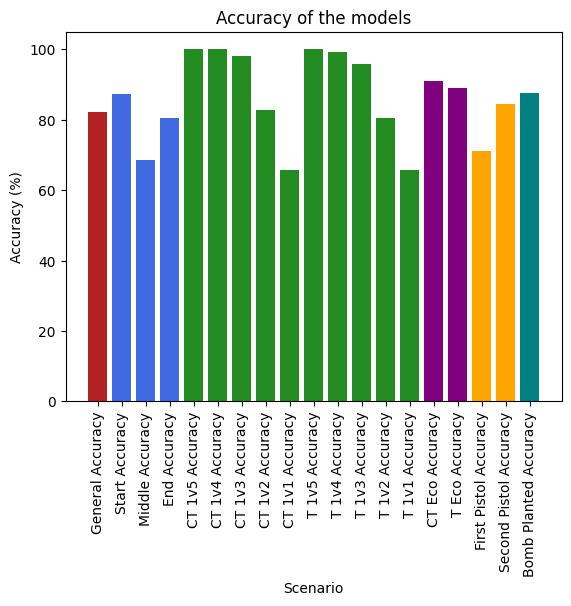

In [56]:
import matplotlib.pyplot as plt

print(accuracyDict)

colors = ['firebrick', 'royalblue', 'royalblue', 'royalblue', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'purple', 'purple', 'orange', 'orange', 'teal']

plt.bar(accuracyDict.keys(), accuracyDict.values(), color=colors)
plt.xticks(rotation=90)
plt.title('Accuracy of the models')
plt.ylabel('Accuracy (%)')
plt.xlabel('Scenario')
plt.show()

As we can see, overall the model is able to predict the outcome of the round with a pretty good accuracy, even in the most difficult situations, like a 1v1 or a pistol round. This is a very good result, and it shows that the model is able to learn the patterns and predict the outcome of the round with a high accuracy. 